In [100]:
import os
import cv2 # openCV
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

In [101]:
FILENAME = "M20251003_233536_MasLaRoca_NE_CROP_SUMIMG.png"
PATH = "../../../data/upftfg26/apujols/processed/sum_image_cropped/"
FILEPATH = PATH + FILENAME
print(FILEPATH)

../../../data/upftfg26/apujols/processed/sum_image_cropped/M20251003_233536_MasLaRoca_NE_CROP_SUMIMG.png


In [102]:
greyscale = cv2.imread(FILEPATH, cv2.IMREAD_GRAYSCALE)

def plot_img_histogram(img):
    counts, bins = np.histogram(img.ravel(), bins=range(257))
    fig = px.bar(x=range(256), y=counts, labels={"x": "pixel value", "y": "count"})

    fig.show()

def percentile_stretch(img, low=2, high=98):
    p_low = np.percentile(img, low)
    p_high = np.percentile(img, high)
    stretched = np.clip((img - p_low) * (255.0 / (p_high - p_low)), 0, 255)
    return stretched

def cv2_equalizer(img):
    return cv2.equalizeHist(img)

def plot_img(img):
    fig = px.imshow(img, color_continuous_scale="gray")
    fig.update_layout(coloraxis_showscale=False)
    fig.show()

def global_threshold(img, T):
    return (img >= T).astype(np.uint8) * 255

def meteor_stretch(img, Bmin, Bmax): 
    stretched = (img - Bmin) * (255.0 / (Bmax - Bmin)) 
    stretched = np.clip(stretched, 0, 255)
    inverted = 1 - stretched 
    return inverted.astype(np.uint8)

In [103]:
def plot_image_and_histograms(original, process_fn):
    # Apply processing
    processed = process_fn(original)

    # Ensure uint8 for display
    original = np.clip(np.squeeze(original), 0, 255).astype(np.uint8)
    processed = np.clip(np.squeeze(processed), 0, 255).astype(np.uint8)

    # Compute histograms
    counts_orig, _ = np.histogram(original.ravel(), bins=range(257))
    counts_proc, _ = np.histogram(processed.ravel(), bins=range(257))

    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # --- Row 1: Original image + histogram ---
    axes[0, 0].imshow(original, cmap="gray", vmin=0, vmax=255)
    axes[0, 0].set_title("Original Image")
    axes[0, 0].axis("off")

    axes[0, 1].bar(range(256), counts_orig, width=1.0)
    axes[0, 1].set_title("Original Histogram")
    axes[0, 1].set_xlim(0, 255)

    # --- Row 2: Processed image + histogram ---
    axes[1, 0].imshow(processed, cmap="gray", vmin=0, vmax=255)
    axes[1, 0].set_title("Processed Image")
    axes[1, 0].axis("off")

    axes[1, 1].bar(range(256), counts_proc, width=1.0)
    axes[1, 1].set_title("Processed Histogram")
    axes[1, 1].set_xlim(0, 255)

    plt.tight_layout()
    plt.show()

In [111]:
processed_imgs = [percentile_stretch(greyscale),
                  cv2_equalizer(greyscale),
                  global_threshold(greyscale, 35),
                  meteor_stretch(greyscale, Bmin=42, Bmax=107)]
titles = ["Percentile stretch",
          "OpenCV equalizer",
          "Global thresholding",
          "Personalized thresholding"]

In [105]:
def plot_images_and_histograms(original, processed_images, titles):
    """
    original: 2D grayscale image
    processed_images: list of 2D grayscale images
    titles: list of titles for each processed image
    """

    # Ensure uint8 and squeeze
    original = np.clip(np.squeeze(original), 0, 255).astype(np.uint8)
    processed_images = [
        np.clip(np.squeeze(img), 0, 255).astype(np.uint8)
        for img in processed_images
    ]

    # Combine original + processed
    all_images = [original] + processed_images
    all_titles = ["Original"] + titles

    n = len(all_images)

    # Create figure: 2 rows (images + histograms)
    fig, axes = plt.subplots(2, n, figsize=(4*n, 8))

    # --- Row 1: Images ---
    for i, img in enumerate(all_images):
        axes[0, i].imshow(img, cmap="gray", vmin=0, vmax=255)
        axes[0, i].set_title(all_titles[i])
        axes[0, i].axis("off")

    # --- Row 2: Histograms ---
    for i, img in enumerate(all_images):
        counts, _ = np.histogram(img.ravel(), bins=range(257))
        axes[1, i].bar(range(256), counts, width=1.0)
        axes[1, i].set_xlim(0, 255)
        axes[1, i].set_title(f"{all_titles[i]} Histogram")

    plt.tight_layout()
    plt.show()

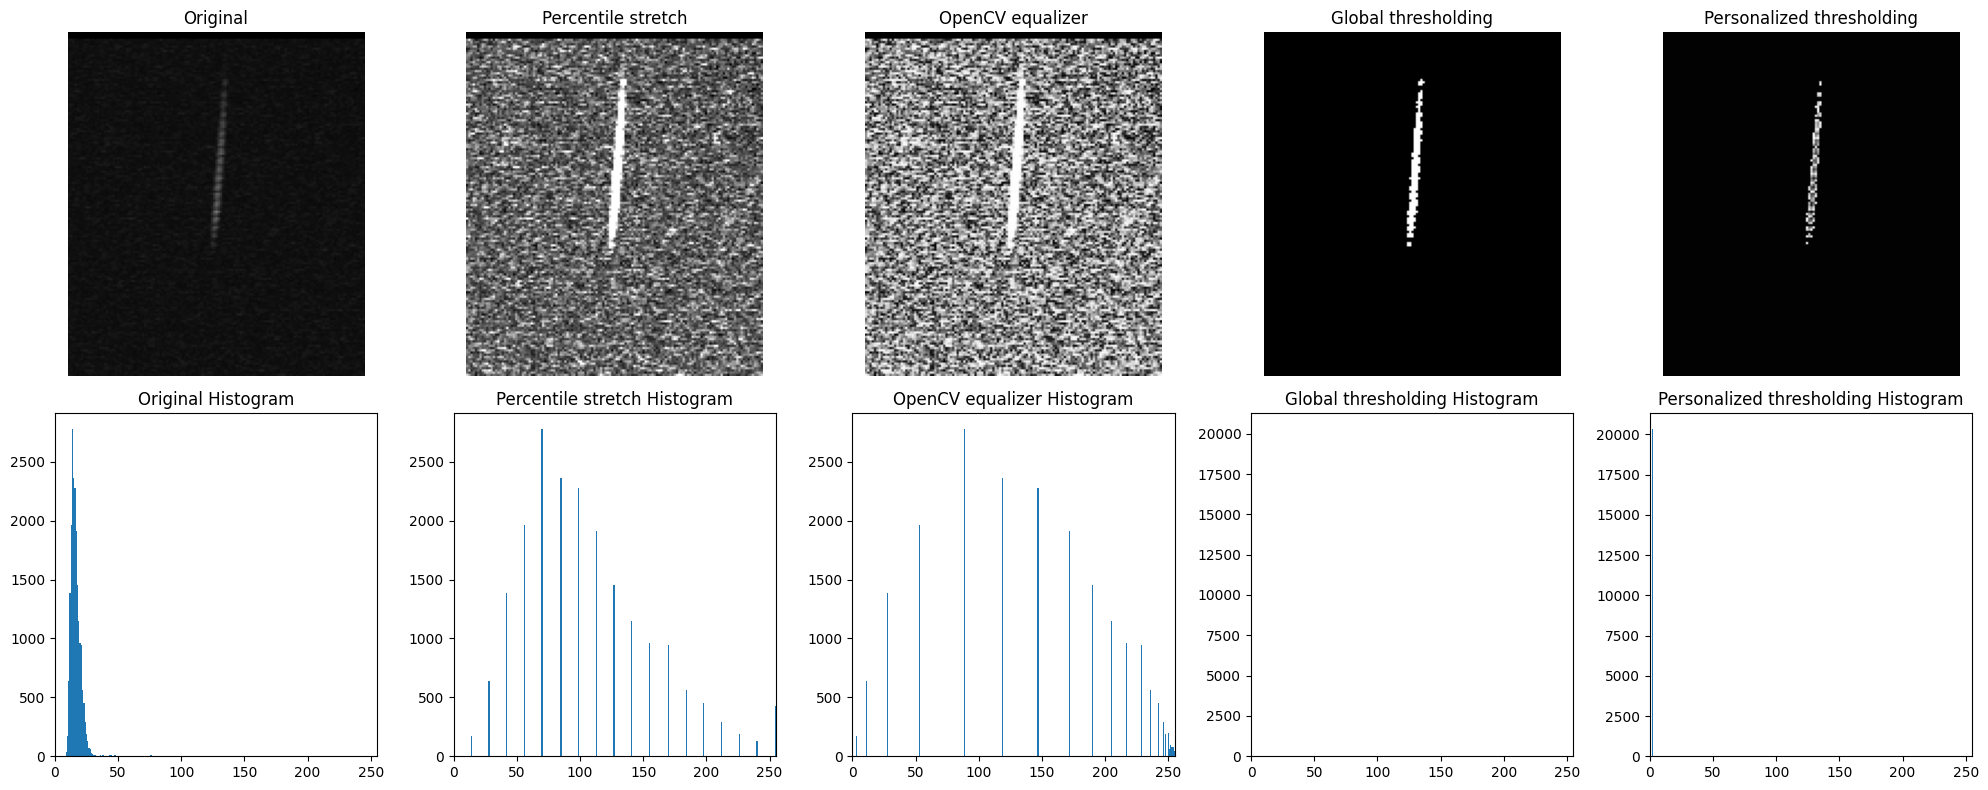

In [112]:
plot_images_and_histograms(greyscale, processed_images=processed_imgs, titles=titles)